In [2]:
!pip install qiskit
!pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.7 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=db1e5c7581d497e39e927f56100176682eff5b7cb75f939f1f054ce180c56b13
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [4]:
import qiskit_aer
from qiskit_aer import Aer
backend = Aer.get_backend("qasm_simulator")
backend

QasmSimulator('qasm_simulator')

In [5]:
from qiskit import QuantumCircuit,transpile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import Parameter
from qiskit.circuit.library import RXXGate, RYYGate ,RZZGate
from qiskit.quantum_info import state_fidelity

In [6]:
def quantum_circuit(t):
  qc = QuantumCircuit(2)
  qc.x(0)#I am taking my initial state to be |01>
  qc.append(RXXGate(2 * t), [0, 1])
  qc.append(RYYGate(2 * t), [0, 1])
  qc.append(RZZGate(2 * t), [0, 1])#applying the heisenberg hamiltonian H = J/4*(XX+YY+ZZ) J = 4 in my case
  qc.measure_all()
  qc.draw('mpl')
  return qc




In [7]:
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import depolarizing_error

noise_model = NoiseModel()

# Error to  2 qubit gates
error_1q = depolarizing_error(0.05, 1)  # 5% error rate
error_2q = depolarizing_error(0.05, 2)  # 5% error rate

# Applying to the  gates
noise_model.add_all_qubit_quantum_error(error_1q, [ 'x'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
noise_model.add_all_qubit_quantum_error(error_2q, [RXXGate(0).name])# Taken 0 as the argument just to initiate the error
noise_model.add_all_qubit_quantum_error(error_2q, [RYYGate(0).name])
noise_model.add_all_qubit_quantum_error(error_2q, [RZZGate(0).name])

In [8]:
noise_model_3 = NoiseModel()

# Error to 3 qubit gates
error_1q = depolarizing_error(0.05, 1)  # 5% error rate
error_2q = depolarizing_error(0.05, 2)  # 5% error rate
error_3q = depolarizing_error(0.05, 3)  # 5% error rate


noise_model.add_all_qubit_quantum_error(error_1q, [ 'x'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
noise_model.add_all_qubit_quantum_error(error_3q, ['ccx'])
noise_model.add_all_qubit_quantum_error(error_2q, [RXXGate(0).name])
noise_model.add_all_qubit_quantum_error(error_2q, [RYYGate(0).name])
noise_model.add_all_qubit_quantum_error(error_2q, [RZZGate(0).name])

In [9]:
def fidelity_from_counts(counts_ideal, counts_noisy):
    shots_ideal = sum(counts_ideal.values())
    shots_noisy = sum(counts_noisy.values())

    all_keys = set(counts_ideal.keys()).union(counts_noisy.keys())

    fidelity = 0
    for key in all_keys:
        p = counts_ideal.get(key, 0) / shots_ideal
        q = counts_noisy.get(key, 0) / shots_noisy
        fidelity += np.sqrt(p * q)

    return fidelity ** 2


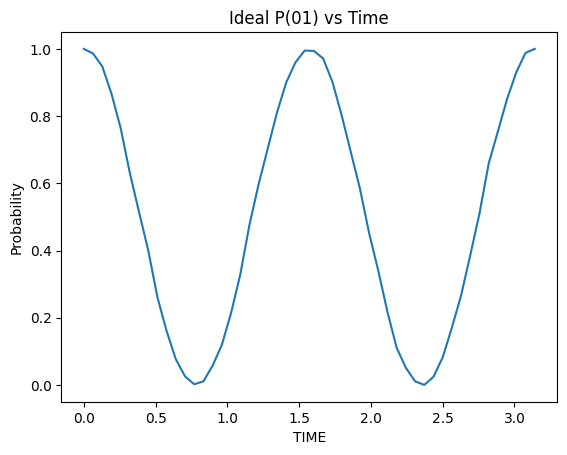

[{'01': 1024}, {'10': 14, '01': 1010}, {'10': 53, '01': 971}, {'10': 136, '01': 888}, {'10': 241, '01': 783}, {'10': 378, '01': 646}, {'10': 497, '01': 527}, {'10': 614, '01': 410}, {'01': 267, '10': 757}, {'01': 164, '10': 860}, {'01': 78, '10': 946}, {'01': 26, '10': 998}, {'01': 2, '10': 1022}, {'01': 11, '10': 1013}, {'01': 59, '10': 965}, {'01': 122, '10': 902}, {'01': 219, '10': 805}, {'01': 336, '10': 688}, {'10': 536, '01': 488}, {'10': 412, '01': 612}, {'10': 302, '01': 722}, {'01': 831, '10': 193}, {'10': 102, '01': 922}, {'10': 41, '01': 983}, {'10': 5, '01': 1019}, {'10': 6, '01': 1018}, {'10': 29, '01': 995}, {'10': 99, '01': 925}, {'10': 200, '01': 824}, {'01': 711, '10': 313}, {'01': 599, '10': 425}, {'10': 561, '01': 463}, {'01': 348, '10': 676}, {'01': 222, '10': 802}, {'01': 113, '10': 911}, {'01': 52, '10': 972}, {'01': 11, '10': 1013}, {'10': 1024}, {'01': 25, '10': 999}, {'01': 84, '10': 940}, {'01': 175, '10': 849}, {'01': 273, '10': 751}, {'01': 396, '10': 628}, 

In [10]:
times = np.linspace(0, np.pi, 50)
p01_ideal = []
p01_noisy = []
counts_ideal_list = []
for t in times:
  t_ideal_qc = transpile(quantum_circuit(t),backend)
  job_ideal = backend.run(t_ideal_qc,shots = 1024)
  result2 = job_ideal.result()
  counts_ideal = result2.get_counts()
  counts_ideal_list.append(counts_ideal)
  p01_ideal.append(counts_ideal.get('01',0)/1024)
#just a demonstration as below
plt.plot(times, p01_ideal, label='Ideal P(01)')
plt.xlabel("TIME")
plt.ylabel("Probability")
plt.title("Ideal P(01) vs Time")
plt.show()
print(counts_ideal_list)

In [11]:
p01 = []
counts_noisy_list = []
for t in times:
  tqc= transpile(quantum_circuit(t),backend)
  job = backend.run(tqc,shots = 1024,noise_model = noise_model)
  result = job.result()

  counts = result.get_counts()
  counts_noisy_list.append(counts)
  p01.append(counts.get('01',0)/1024)


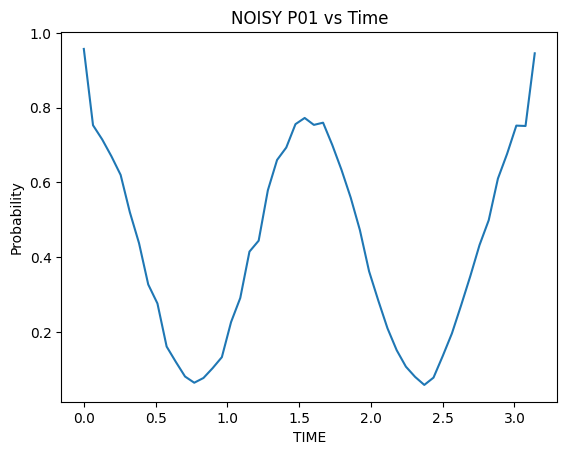

In [12]:
#just a demonstration for the noise
plt.plot(times, p01, label='Noisy P(01)')
plt.xlabel("TIME")
plt.ylabel("Probability")
plt.title("NOISY P01 vs Time")
plt.show()

Text(0, 0.5, 'Fidelity')

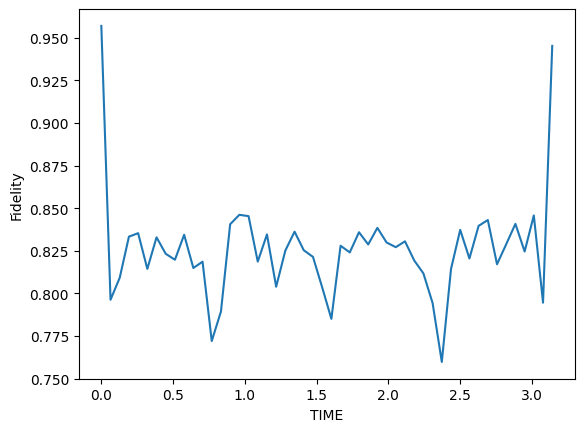

In [13]:
fidelity_values = []
for i in  range(50):

    c_ideal = counts_ideal_list[i]
    c_noisy = counts_noisy_list[i]

    f = fidelity_from_counts(c_ideal, c_noisy)
    fidelity_values.append(f)
plt.plot(times,fidelity_values,label = " FIDELITY")
plt.xlabel("TIME")
plt.ylabel("Fidelity")

In [14]:
def compute_ZI(counts):
    total = sum(counts.values())
    zi = 0
    for bitstring, count in counts.items():
        z0 = 1 if bitstring[0] == '0' else -1
        z1 = 1
        zi += (z0 * z1) * (count / total)
    return zi


In [15]:
def compute_ZZ(counts):
    total = sum(counts.values())
    zi = 0
    for bitstring, count in counts.items():
        z0 = 1 if bitstring[0] == '0' else -1
        z1 = 1 if bitstring[1] == '0' else -1
        zi += (z0 * z1) * (count / total)
    return zi


In [16]:
def compute_IZ(counts):
    total = sum(counts.values())
    iz = 0
    for bitstring, count in counts.items():
        z1 = 1 if bitstring[0] == '0' else -1
        z0 = 1
        iz += (z0 * z1) * (count / total)
    return iz


In [17]:
ZI_corr = []
for i in range(50):
    counts = counts_ideal_list[i]
    ZI = compute_ZI(counts)
    ZI_corr.append(ZI)


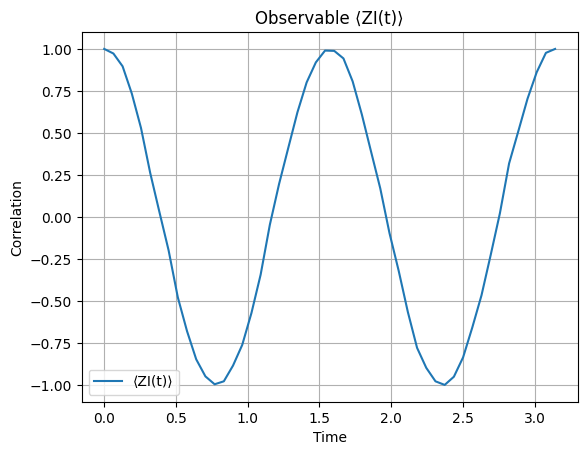

In [18]:
plt.plot(times, ZI_corr, label='⟨ZI(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Observable ⟨ZI(t)⟩')
plt.grid(True)
plt.legend()
plt.show()


In [20]:
C01_corr  = []
for i in range(50):
    counts = counts_ideal_list[i]
    ZI = compute_ZI(counts)
    IZ = compute_IZ(counts)
    ZZ = compute_ZZ(counts)
    C01_corr.append(ZZ-ZI)


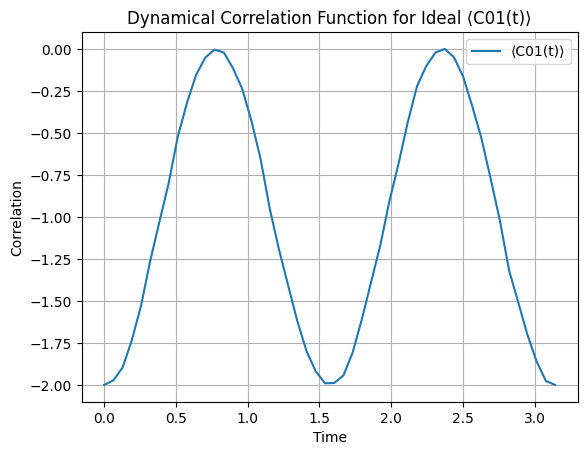

In [21]:
plt.plot(times, C01_corr, label='⟨C01(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Dynamical Correlation Function for Ideal ⟨C01(t)⟩')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
IZ_corr = []
for i in range(50):
    counts = counts_ideal_list[i]
    IZ = compute_IZ(counts)
    IZ_corr.append(IZ)


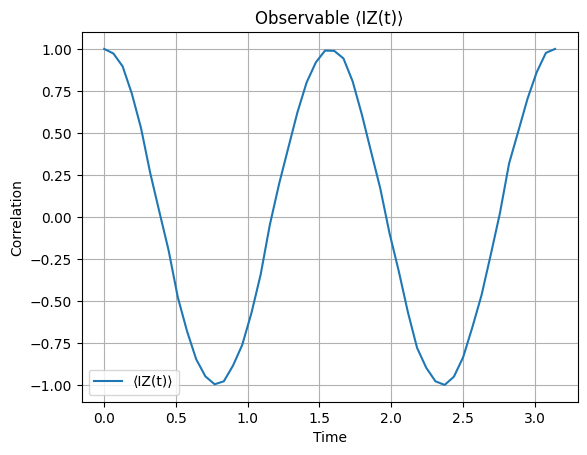

In [23]:
plt.plot(times, IZ_corr, label='⟨IZ(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Observable ⟨IZ(t)⟩')
plt.grid(True)
plt.legend()
plt.show()


In [24]:
C10_corr  = []
for i in range(50):
    counts = counts_ideal_list[i]
    ZI = compute_ZI(counts)
    IZ = compute_IZ(counts)
    ZZ = compute_ZZ(counts)
    C10_corr.append(ZZ-IZ)

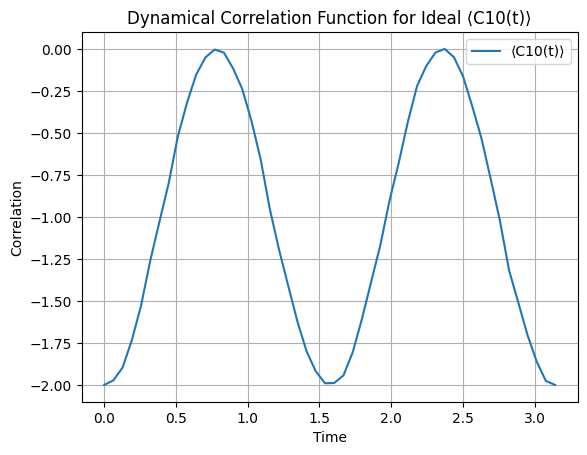

In [25]:
plt.plot(times, C10_corr, label='⟨C10(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Dynamical Correlation Function for Ideal ⟨C10(t)⟩')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
ZI_corr_noisy = []
for i in range(50):
    counts = counts_noisy_list[i]
    ZI_noisy = compute_ZI(counts)
    ZI_corr_noisy.append(ZI_noisy)


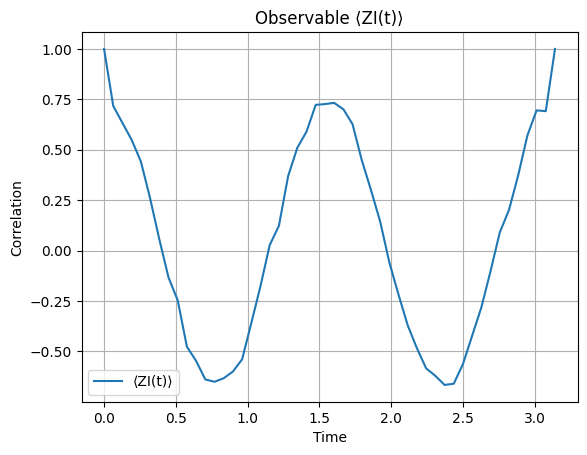

In [27]:
plt.plot(times, ZI_corr_noisy, label='⟨ZI(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Observable ⟨ZI(t)⟩')
plt.grid(True)
plt.legend()
plt.show()


In [28]:
IZ_corr_noisy = []
for i in range(50):
    counts = counts_noisy_list[i]
    IZ_noisy = compute_IZ(counts)
    IZ_corr_noisy.append(IZ_noisy)


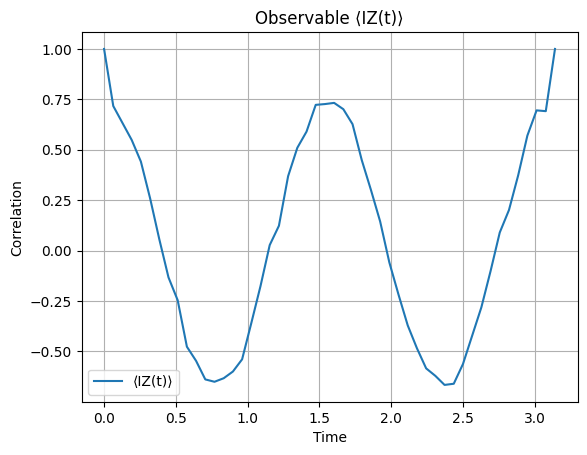

In [29]:
plt.plot(times, IZ_corr_noisy, label='⟨IZ(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Observable ⟨IZ(t)⟩')
plt.grid(True)
plt.legend()
plt.show()


In [30]:
def quantum_circuit_3(t):
  qc = QuantumCircuit(3)
  qc.x(0)
  qc.append(RXXGate(2 * t), [0, 1])
  qc.append(RYYGate(2 * t), [0, 1])
  qc.append(RZZGate(2 * t), [0, 1])
  qc.append(RXXGate(2 * t), [1, 2])
  qc.append(RYYGate(2 * t), [1, 2])
  qc.append(RZZGate(2 * t), [1, 2])
  qc.measure_all()
  return qc

In [31]:
counts_noisy_list = []
for t in times:
  tqc= transpile(quantum_circuit_3(t),backend)
  job = backend.run(tqc,shots = 1024,noise_model = noise_model_3)
  result = job.result()

  counts = result.get_counts()
  counts_noisy_list.append(counts)


In [32]:
counts_ideal_list = []
for t in times:
  tqc= transpile(quantum_circuit_3(t),backend)
  job = backend.run(tqc,shots = 1024)
  result = job.result()

  counts = result.get_counts()
  counts_ideal_list.append(counts)

Text(0, 0.5, 'Fidelity')

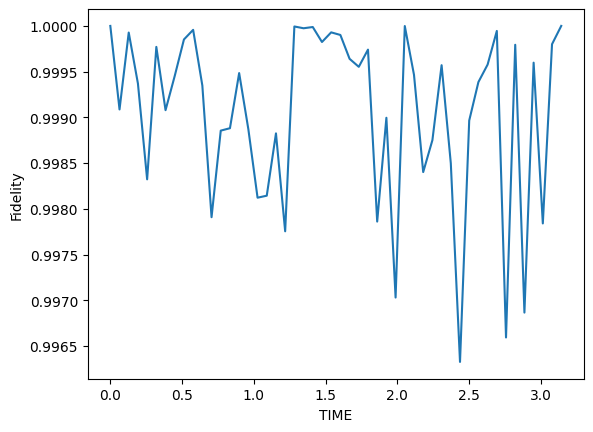

In [33]:
fidelity_values = []
for i in  range(50):

    c_ideal = counts_ideal_list[i]
    c_noisy = counts_noisy_list[i]

    f = fidelity_from_counts(c_ideal, c_noisy)
    fidelity_values.append(f)
plt.plot(times,fidelity_values,label = " FIDELITY")
plt.xlabel("TIME")
plt.ylabel("Fidelity")

In [34]:
def compute_ZZI(counts):
    total = sum(counts.values())
    zi = 0
    for bitstring, count in counts.items():
        z0 = 1 if bitstring[0] == '0' else -1
        z1 = 1 if bitstring[1] == '0' else -1
        z2 = 1
        zi += (z0 * z1) *(z2)* (count / total)
    return zi

In [35]:
ZZI_corr_noisy = []
for i in range(50):
    counts = counts_noisy_list[i]
    ZZI_noisy = compute_ZZI(counts)
    ZZI_corr_noisy.append(ZZI_noisy)

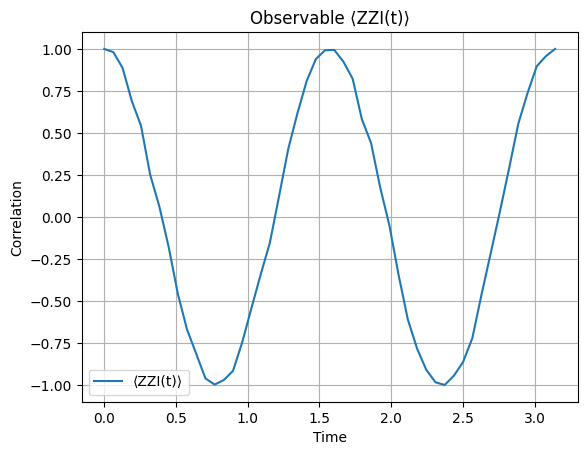

In [36]:
plt.plot(times, ZZI_corr_noisy, label='⟨ZZI(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Observable ⟨ZZI(t)⟩')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
ZZI_corr_ideal = []
for i in range(50):
    counts = counts_ideal_list[i]
    ZZI_ideal = compute_ZZI(counts)
    ZZI_corr_ideal.append(ZZI_ideal)

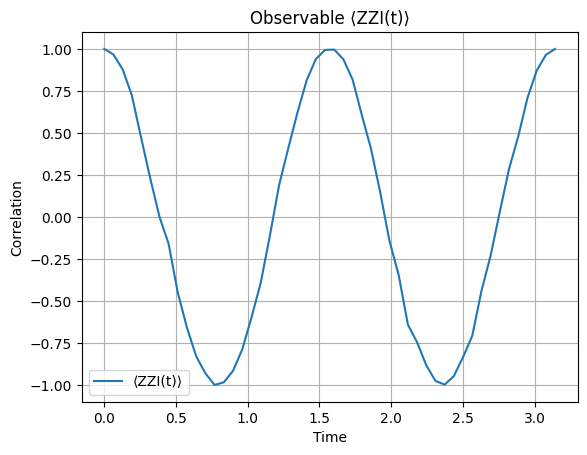

In [38]:
plt.plot(times, ZZI_corr_ideal,label='⟨ZZI(t)⟩')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Observable ⟨ZZI(t)⟩')
plt.grid(True)
plt.legend()
plt.show()